<a href="https://colab.research.google.com/github/Keii35100/Thyriod_BPNN/blob/CubaanInsanitydsl/Thyroid_BPNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [16]:
# read data
df = pd.read_csv('cl_thyroid_conditions(1).csv')

# check for missing values - train
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          516 non-null    float64
 1   sex=M        516 non-null    int64  
 2   TSH          516 non-null    float64
 3   T3           516 non-null    float64
 4   TT4          516 non-null    float64
 5   T4U          516 non-null    float64
 6   FTI          516 non-null    float64
 7   target_sick  516 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 32.4 KB


In [18]:
df['target_sick'].value_counts()

#(300/(300+216))

0    300
1    216
Name: target_sick, dtype: int64

In [19]:
# split into X and Y
x = df.drop(['sex=M', 'target_sick'], axis = 1)
y = df['target_sick']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=0)

# convert to numpy arrays
#X = np.array(X)

In [21]:
model = Sequential() 
model.add(Dense(128, activation='relu', input_dim=6))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               896       
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,025
Trainable params: 1,025
Non-trainable params: 0
_________________________________________________________________


In [22]:
print("Fit model on training data")
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=100)


Fit model on training data
Epoch 1/10
5/5 [==============================] - 1s 55ms/step - loss: 0.6833 - accuracy: 0.5825 - val_loss: 0.6687 - val_accuracy: 0.6154
Epoch 2/10
5/5 [==============================] - 0s 8ms/step - loss: 0.6690 - accuracy: 0.5825 - val_loss: 0.6556 - val_accuracy: 0.5769
Epoch 3/10
5/5 [==============================] - 0s 10ms/step - loss: 0.6572 - accuracy: 0.5825 - val_loss: 0.6452 - val_accuracy: 0.5769
Epoch 4/10
5/5 [==============================] - 0s 9ms/step - loss: 0.6473 - accuracy: 0.5825 - val_loss: 0.6350 - val_accuracy: 0.5769
Epoch 5/10
5/5 [==============================] - 0s 9ms/step - loss: 0.6377 - accuracy: 0.5850 - val_loss: 0.6246 - val_accuracy: 0.5769
Epoch 6/10
5/5 [==============================] - 0s 10ms/step - loss: 0.6281 - accuracy: 0.5850 - val_loss: 0.6141 - val_accuracy: 0.5769
Epoch 7/10
5/5 [==============================] - 0s 11ms/step - loss: 0.6183 - accuracy: 0.5850 - val_loss: 0.6040 - val_accuracy: 0.5769
Epo

[]

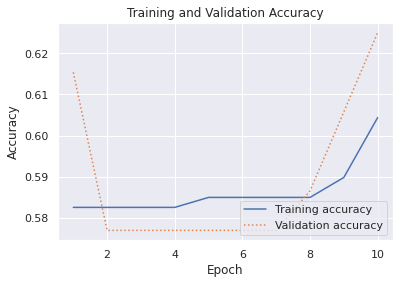

In [23]:
sns.set()
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

Text(89.18, 0.5, 'Actual label')

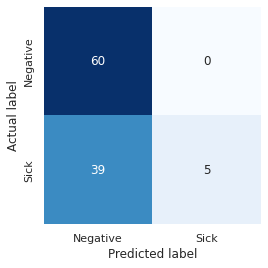

In [24]:
y_predicted = model.predict(x_test) > 0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['Negative', 'Sick']

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted label')
plt.ylabel('Actual label')